Using /tmp/astropy-download-10328-a1d2kwmq


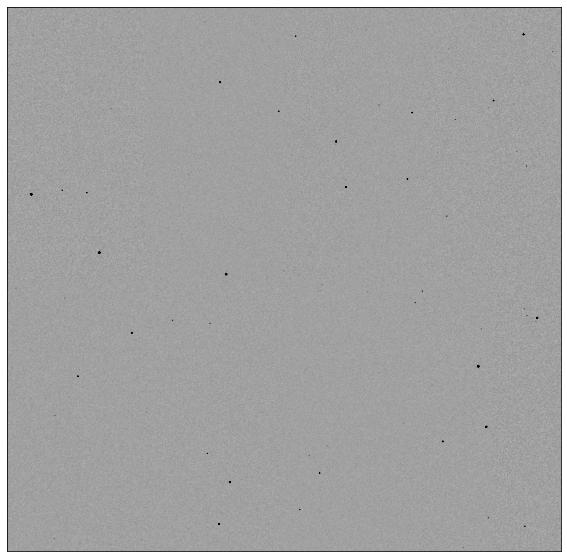

In [8]:
import matplotlib.pyplot as plt
import os
from astropy.wcs import WCS
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()

# get the data
from astropy.utils import data
remote_url = 'https://lsst.ncsa.illinois.edu/~scichris/postISRCCD_LSSTComCam_r_03_CC_H_20211231_006002_R22_S01_run1.fits'
file_path = data.download_file(remote_url)
print(f'Using {file_path}')

# make a WCS object 
hdul = fits.open(file_path)
wcs = WCS(hdul[1].header)

data = hdul[1].data
vmin, vmax = zscale.get_limits(data)

# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys',)
#ax.grid(color='yellow', ls='solid')
# ax.set_xlabel('Right Ascension')
# ax.set_ylabel('Declination')

ra = ax.coords['ra']
dec = ax.coords['dec']

ra.set_ticks(spacing=2 * u.arcmin, color='white')
dec.set_ticks(spacing=2 * u.arcmin, color='white')

ra.set_axislabel('RA', minpad=0.3)
dec.set_axislabel('DEC', minpad=0.3)

ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
ra.set_ticks_position('all')

In [6]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("Numpy", numpy.__version__)
import astropy; print("astropy", astropy.__version__)
import scipy; print("Scipy", scipy.__version__)
import matplotlib; print("Matplotlib", matplotlib.__version__)

Linux-3.10.0-1160.15.2.el7.x86_64-x86_64-with-glibc2.10
Python 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) 
[GCC 9.3.0]
Numpy 1.20.2
astropy 4.2.1
Scipy 1.6.3
Matplotlib 3.4.2


The above code was submitteed as https://github.com/astropy/astropy/issues/11765 